# Employee Absenteism

XYZ is a courier company. As we appreciate that human capital plays an important role
in collection, transportation and delivery. The company is passing through genuine
issue of Absenteeism. The company has shared it dataset and requested to have an
answer on the following areas:
1. What changes company should bring to reduce the number of absenteeism?
2. How much losses every month can we project in 2011 if same trend of
absenteeism continues?


In [49]:
import os 
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#seting the folder where the data is saved
os.chdir("E:\DS\Project\Emeployee Absenteism")
os.getcwd()

'E:\\DS\\Project\\Emeployee Absenteism'

###### Reading data

In [3]:
absenteism_data = pd.read_excel('Absenteeism.xls', trim_ws = True)

In [4]:
#Setting display to view all the coloumns on the screen
pd.set_option('display.max_columns', 500)
absenteism_data

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0
5,3,23.0,7.0,6,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,NaN
6,10,22.0,7.0,6,1,NaN,52.0,3.0,28.0,239554.0,97.0,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
7,20,23.0,7.0,6,1,260.0,50.0,11.0,36.0,239554.0,97.0,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,4.0
8,14,19.0,7.0,2,1,155.0,12.0,14.0,34.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,0.0,95.0,196.0,25.0,40.0
9,1,22.0,7.0,2,1,235.0,11.0,14.0,37.0,239554.0,97.0,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,8.0


In [14]:
#Understand the data type of all the avriables of the dataset
absenteism_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 737 non-null float64
Month of absence                   739 non-null float64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             733 non-null float64
Distance from Residence to Work    737 non-null float64
Service time                       737 non-null float64
Age                                737 non-null float64
Work load Average/day              730 non-null float64
Hit target                         734 non-null float64
Disciplinary failure               734 non-null float64
Education                          730 non-null float64
Son                                734 non-null float64
Social drinker                     737 non-null float64
Social smoker                      736 non-null float64
Pet  

In [5]:
#Renaming Columns
absenteism_data.columns = ['ID', 'Reason.for.absence', 'Month.of.absence', 'Day.of.the.week',
       'Seasons', 'Transportation.expense','Distance.from.Residence.to.Work', 'Service.time', 'Age',
       'Work.load.Average.day', 'Hit.target', 'Disciplinary.failure','Education', 'Son', 'Social.drinker', 'Social.smoker', 'Pet',
       'Weight', 'Height', 'Body.mass.index', 'Absenteeism.time.in.hours']

#### Removing Observations with 'Absenteeism.time.in.hours' equal to zero

In [6]:
absenteism_data = absenteism_data.loc[absenteism_data['Absenteeism.time.in.hours']!= 0,:]

In [7]:
absenteism_data.shape

(704, 21)

# Missing values Analysis

In [8]:
absenteism_data.isna().sum()
Missing_Value = pd.DataFrame((absenteism_data.isna().sum()/len(absenteism_data)*100))

Missing_Value.reset_index()
Missing_Value = Missing_Value.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})
#Arranging Missing Values in Decreasing Order
Missing_Value = Missing_Value.sort_values('Missing_percentage', ascending = False)
Missing_Value

,Missing_percentage
Body.mass.index,4.119318
Absenteeism.time.in.hours,3.125000
Height,1.846591
Work.load.Average.day,1.420455
Education,1.420455
Transportation.expense,0.994318
Son,0.852273
Disciplinary.failure,0.852273
Hit.target,0.852273
Social.smoker,0.568182


In [9]:
pd.DataFrame(absenteism_data[absenteism_data['Reason.for.absence'].isna()])

,ID,Reason.for.absence,Month.of.absence,Day.of.the.week,Seasons,Transportation.expense,Distance.from.Residence.to.Work,Service.time,Age,Work.load.Average.day,Hit.target,Disciplinary.failure,Education,Son,Social.drinker,Social.smoker,Pet,Weight,Height,Body.mass.index,Absenteeism.time.in.hours
367,3,NaN,1.0,4,2,179.0,51.0,18.0,38.0,330061.0,100.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,1.0
373,20,NaN,2.0,6,2,260.0,50.0,11.0,36.0,251818.0,96.0,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,3.0
380,6,NaN,2.0,2,2,189.0,29.0,13.0,33.0,251818.0,96.0,0.0,1.0,2.0,0.0,0.0,2.0,69.0,167.0,25.0,8.0


##### Imputing missing values
Null values of 'Reason.for.absence' column equal to 27(i.e. physiotherapy) since Absenteeism.time.in.hourshours are < 10 and physiotherapy can stretch to any amount of time.

In [10]:
absenteism_data.loc[absenteism_data['Reason.for.absence'].isnull(),'Reason.for.absence'] = 27

C:\Users\Hasan\Anaconda2\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Putting zero category of 'Reason.for.absence' column equal to 26(i.e. unjustified absence).

In [11]:
absenteism_data.loc[absenteism_data['Reason.for.absence']==0,'Reason.for.absence'] = 26

In [12]:
absenteism_data.loc[absenteism_data['Month.of.absence'].isnull()]

,ID,Reason.for.absence,Month.of.absence,Day.of.the.week,Seasons,Transportation.expense,Distance.from.Residence.to.Work,Service.time,Age,Work.load.Average.day,Hit.target,Disciplinary.failure,Education,Son,Social.drinker,Social.smoker,Pet,Weight,Height,Body.mass.index,Absenteeism.time.in.hours
66,3,23.0,NaN,6,4,179.0,51.0,18.0,38.0,253465.0,93.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,3.0


As we can see above the season is 4 for 'Month.of.absence' null. Let's take this value equal to 10.

In [13]:
absenteism_data.loc[absenteism_data['Month.of.absence'].isnull(),'Month.of.absence'] = 10

'Transportation.expense' depends on 'Distance.from.Residence.to.Work' so we will use 'Distance.from.Residence.to.Work' values to impute missing values in 'Transportation.expense' 

In [14]:
absenteism_data.loc[(absenteism_data['Transportation.expense'].isnull()) & (absenteism_data['Distance.from.Residence.to.Work']==51),\
'Transportation.expense'] = absenteism_data.loc[absenteism_data['Distance.from.Residence.to.Work']==51,'Transportation.expense'].mode()[0]

absenteism_data.loc[(absenteism_data['Transportation.expense'].isnull()) & (absenteism_data['Distance.from.Residence.to.Work']==50),\
'Transportation.expense'] = absenteism_data.loc[absenteism_data['Distance.from.Residence.to.Work']==50,'Transportation.expense'].mode()[0]

absenteism_data.loc[(absenteism_data['Transportation.expense'].isnull()) & (absenteism_data['Distance.from.Residence.to.Work']==52),\
'Transportation.expense'] = absenteism_data.loc[absenteism_data['Distance.from.Residence.to.Work']==52,'Transportation.expense'].mode()[0]

absenteism_data.loc[(absenteism_data['Transportation.expense'].isnull()) & (absenteism_data['Distance.from.Residence.to.Work']==11),\
'Transportation.expense'] = absenteism_data.loc[absenteism_data['Distance.from.Residence.to.Work']==11,'Transportation.expense'].mode()[0]

absenteism_data.loc[(absenteism_data['Transportation.expense'].isnull()) & (absenteism_data['Distance.from.Residence.to.Work']==31),\
'Transportation.expense'] = absenteism_data.loc[absenteism_data['Distance.from.Residence.to.Work']==31,'Transportation.expense'].mode()[0]

absenteism_data.loc[(absenteism_data['Transportation.expense'].isnull()) & (absenteism_data['ID']==22),\
'Transportation.expense'] = absenteism_data.loc[absenteism_data['ID']==22,'Transportation.expense'].mode()[0]

Using 'ID' column to impute missing value for 'Distance.from.Residence.to.Work'

In [15]:
absenteism_data.loc[(absenteism_data['Distance.from.Residence.to.Work'].isnull()) & (absenteism_data['ID']==34),\
'Distance.from.Residence.to.Work'] = absenteism_data.loc[absenteism_data['ID']==34,'Distance.from.Residence.to.Work'].mode()[0]

absenteism_data.loc[(absenteism_data['Distance.from.Residence.to.Work'].isnull()) & (absenteism_data['ID']==22),\
'Distance.from.Residence.to.Work'] = absenteism_data.loc[absenteism_data['ID']==22,'Distance.from.Residence.to.Work'].mode()[0]

absenteism_data.loc[(absenteism_data['Distance.from.Residence.to.Work'].isnull()) & (absenteism_data['ID']==28),\
'Distance.from.Residence.to.Work'] = absenteism_data.loc[absenteism_data['ID']==28,'Distance.from.Residence.to.Work'].mode()[0]

Using 'ID' column to impute missing values for 'Service.time' 

In [16]:
absenteism_data.loc[(absenteism_data['Service.time'].isnull()) & (absenteism_data['ID']==34),\
'Service.time'] = absenteism_data.loc[absenteism_data['ID']==34,'Service.time'].mode()[0]

absenteism_data.loc[(absenteism_data['Service.time'].isnull()) & (absenteism_data['ID']==28),\
'Service.time'] = absenteism_data.loc[absenteism_data['ID']==28,'Service.time'].mode()[0]

Using 'ID' column to impute missing values for 'Age' 

In [17]:
absenteism_data.loc[(absenteism_data['Age'].isnull()) & (absenteism_data['ID']==24),\
'Age'] = absenteism_data.loc[absenteism_data['ID']==24,'Age'].mode()[0]

absenteism_data.loc[(absenteism_data['Age'].isnull()) & (absenteism_data['ID']==28),\
'Age'] = absenteism_data.loc[absenteism_data['ID']==28,'Age'].mode()[0]

'Work load Average/day' values are dependent upon 'Month.of.absence' and 'Hit.target' values

In [18]:
absenteism_data.loc[absenteism_data['Work.load.Average.day'].isnull()]

,ID,Reason.for.absence,Month.of.absence,Day.of.the.week,Seasons,Transportation.expense,Distance.from.Residence.to.Work,Service.time,Age,Work.load.Average.day,Hit.target,Disciplinary.failure,Education,Son,Social.drinker,Social.smoker,Pet,Weight,Height,Body.mass.index,Absenteeism.time.in.hours
55,36,26.0,9.0,3,4,118.0,13.0,18.0,50.0,NaN,92.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,NaN
77,11,26.0,10.0,4,4,289.0,36.0,13.0,33.0,NaN,93.0,0.0,NaN,2.0,1.0,0.0,1.0,90.0,172.0,NaN,8.0
84,15,23.0,11.0,5,4,291.0,31.0,12.0,40.0,NaN,93.0,0.0,1.0,1.0,1.0,0.0,1.0,73.0,171.0,25.0,5.0
93,20,28.0,11.0,6,4,260.0,50.0,11.0,36.0,NaN,93.0,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,4.0
104,34,19.0,12.0,3,4,118.0,10.0,10.0,37.0,NaN,97.0,0.0,1.0,0.0,0.0,0.0,0.0,83.0,172.0,28.0,56.0
105,10,22.0,12.0,4,4,361.0,52.0,3.0,28.0,NaN,97.0,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
113,28,23.0,1.0,4,2,225.0,26.0,9.0,28.0,NaN,95.0,0.0,1.0,1.0,0.0,0.0,2.0,69.0,NaN,24.0,1.0
114,34,19.0,1.0,2,2,118.0,10.0,10.0,37.0,NaN,95.0,0.0,1.0,0.0,0.0,NaN,0.0,83.0,NaN,28.0,1.0
132,27,23.0,1.0,5,2,184.0,42.0,7.0,27.0,NaN,95.0,0.0,1.0,0.0,0.0,0.0,0.0,58.0,NaN,21.0,2.0
219,10,22.0,5.0,6,3,361.0,52.0,3.0,28.0,NaN,92.0,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,NaN


In [19]:
#We assume i to take values of months and hit target values and impute respect Work load Average/Day values.
for i in [(9,92),(10,93),(11,93),(12,97),(1,95),(5,92)]:
    absenteism_data.loc[((absenteism_data['Work.load.Average.day'].isnull()) & (absenteism_data['Month.of.absence']==i[0])) & (absenteism_data['Hit.target']==i[1]),\
    'Work.load.Average.day'] = absenteism_data.loc[(absenteism_data['Month.of.absence']==i[0]) & (absenteism_data['Hit.target']==i[1]),\
    'Work.load.Average.day'].mode()[0]

'Hit.target' values are dependent upon 'Month.of.absence' and 'Work load Average/day' values. We assume i as values of 'Month.of.absence' & 'Work load Average/day' for which Hit.target is vaues are missing. We observe that : 
'Month.of.absence' = 11 & 'Work load Average/day' = 306345 the Hit target = 93.0
'Month.of.absence' = 12 & 'Work load Average/day' = 308593 the Hit target = 97.0
'Month.of.absence' = 1 & 'Work load Average/day' = 261306 the Hit target = 95.0

In [20]:
for i in [(11.0,306345.0),(12.0,261306.0),(1.0,308593.0)]:
    absenteism_data.loc[(absenteism_data['Hit.target'].isnull()) & ((absenteism_data['Month.of.absence']==i[0]) & (absenteism_data['Work.load.Average.day']==i[1])),\
    'Hit.target'] = absenteism_data.loc[(absenteism_data['Month.of.absence']==i[0]) & (absenteism_data['Work.load.Average.day']==i[1]),\
    'Hit.target'].mode()[0]
 

'Disciplinary.failure' missing values have been put to 0

In [21]:
absenteism_data.loc[absenteism_data['Disciplinary.failure'].isnull(),'Disciplinary.failure'] = 0

Using 'ID' column to impute missing values for 'Education'.

In [22]:
for i in [11,10,34,14,24]:
    absenteism_data.loc[(absenteism_data['Education'].isnull()) & (absenteism_data['ID']==i),'Education'] = absenteism_data.loc[absenteism_data['ID']==i,'Education'].mode()[0]

Using 'ID' column to impute missing values for 'Son'.

In [23]:
for i in [20,14,34,27,1]:
    absenteism_data.loc[(absenteism_data['Son'].isnull()) & (absenteism_data['ID']==i),'Son'] = absenteism_data.loc[absenteism_data['ID']==i,'Son'].mode()[0]

Using 'ID' column to impute missing values for 'Social.drinker'.

In [24]:
for i in [10,14,17]:
    absenteism_data.loc[(absenteism_data['Social.drinker'].isnull()) & (absenteism_data['ID']==i),'Social.drinker'] = absenteism_data.loc[absenteism_data['ID']==i,'Social.drinker'].mode()[0]

Using 'ID' column to impute missing values for 'Social.smoker'.

In [25]:
for i in [34,1,11,15]:
    absenteism_data.loc[(absenteism_data['Social.smoker'].isnull()) & (absenteism_data['ID']==i),'Social.smoker'] = absenteism_data.loc[absenteism_data['ID']==i,'Social.smoker'].mode()[0]

Using 'ID' to impute missing values for 'Pet','Weight','Height','Body.mass.index'

In [26]:
for i in [1,13]:
    absenteism_data.loc[(absenteism_data['Pet'].isnull()) & (absenteism_data['ID']==i),'Pet'] = absenteism_data.loc[absenteism_data['ID']==i,'Pet'].mode()[0]

In [27]:
for i in [27]:
    absenteism_data.loc[(absenteism_data['Weight'].isnull()) & (absenteism_data['ID']==i),'Weight'] = absenteism_data.loc[absenteism_data['ID']==i,'Weight'].mode()[0]

In [28]:
for i in [20,10,28,34,27,11,5,22,13,24,32]:
    absenteism_data.loc[(absenteism_data['Height'].isnull()) & (absenteism_data['ID']==i),'Height'] = absenteism_data.loc[absenteism_data['ID']==i,'Height'].mode()[0]

In [29]:
for i in [3,24,11,30,2,19,34,28,13,36,14,20,18,17,15,22,5]:
    absenteism_data.loc[(absenteism_data['Body.mass.index'].isnull()) & (absenteism_data['ID']==i),'Body.mass.index'] = absenteism_data.loc[absenteism_data['ID']==i,'Body.mass.index'].mode()[0]

Using 'Reason.for.absence' for imputing missing values in 'Absenteeism.time.in.hours'

In [30]:
for i in [23,14,10,22,26,6,28,11,13]:
    absenteism_data.loc[(absenteism_data['Absenteeism.time.in.hours'].isnull()) & (absenteism_data['Reason.for.absence']==i),'Absenteeism.time.in.hours'] = absenteism_data.loc[absenteism_data['Reason.for.absence']==i,'Absenteeism.time.in.hours'].median()

Using 'ID' to impute missing values in 'Son'

In [31]:
absenteism_data.loc[absenteism_data['Son'].isnull()]

,ID,Reason.for.absence,Month.of.absence,Day.of.the.week,Seasons,Transportation.expense,Distance.from.Residence.to.Work,Service.time,Age,Work.load.Average.day,Hit.target,Disciplinary.failure,Education,Son,Social.drinker,Social.smoker,Pet,Weight,Height,Body.mass.index,Absenteeism.time.in.hours


In [32]:
for i in [20,14,34,34,27,1]:
    absenteism_data.loc[(absenteism_data['Son'].isnull()) & (absenteism_data['ID']==i),'Son'] = absenteism_data.loc[absenteism_data['ID']==i,'Son'].mode()[0]

In [44]:
absenteism_data.isna().sum()
Missing_Value = pd.DataFrame((absenteism_data.isna().sum()/len(absenteism_data)*100))

Missing_Value.reset_index()
Missing_Value = Missing_Value.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})
#Arranging Missing Values in Decreasing Order
Missing_Value = Missing_Value.sort_values('Missing_percentage', ascending = False)
Missing_Value

,Missing_percentage
ID,0.0
Disciplinary.failure,0.0
Body.mass.index,0.0
Height,0.0
Weight,0.0
Pet,0.0
Social.smoker,0.0
Social.drinker,0.0
Son,0.0
Education,0.0


#### All missing values have been imputed.

Converting 'Work load Average/day' variable from object to int type.

In [35]:
absenteism_data['Work.load.Average.day'] = absenteism_data['Work.load.Average.day'].astype('int64')

C:\Users\Hasan\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# Continuous Variables Distributions

C:\Users\Hasan\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


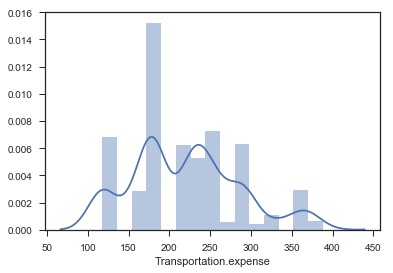

In [86]:
sns.distplot(absenteism_data['Transportation.expense'])

C:\Users\Hasan\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


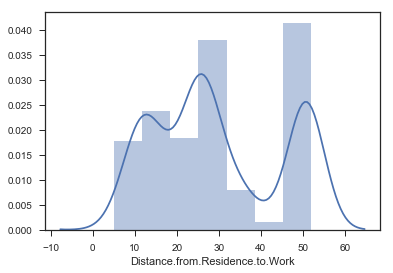

In [87]:
sns.distplot(absenteism_data['Distance.from.Residence.to.Work'])

C:\Users\Hasan\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


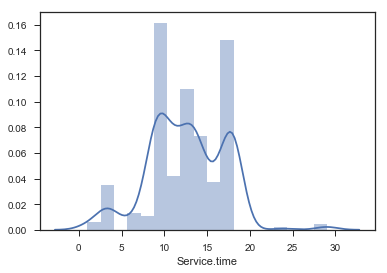

In [88]:
sns.distplot(absenteism_data['Service.time'])

C:\Users\Hasan\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


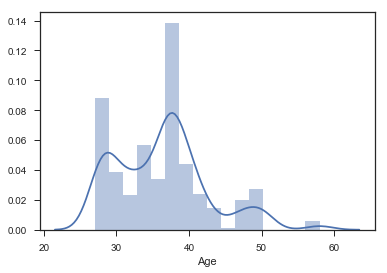

In [89]:
sns.distplot(absenteism_data['Age'])

C:\Users\Hasan\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


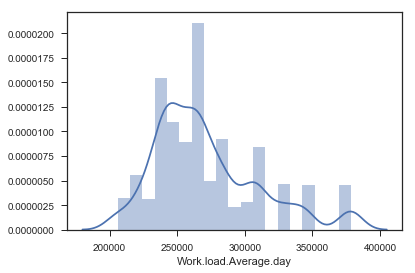

In [90]:
sns.distplot(absenteism_data['Work.load.Average.day'])

C:\Users\Hasan\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


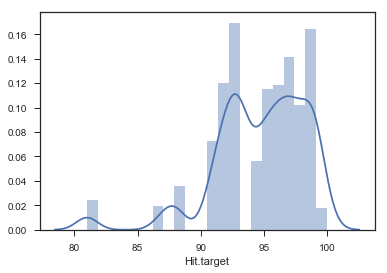

In [91]:
sns.distplot(absenteism_data['Hit.target'])

C:\Users\Hasan\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


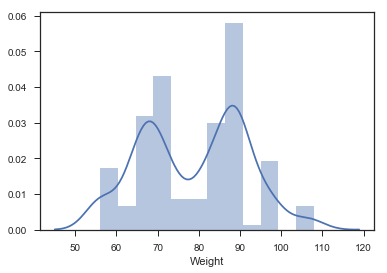

In [92]:
sns.distplot(absenteism_data['Weight'])

C:\Users\Hasan\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


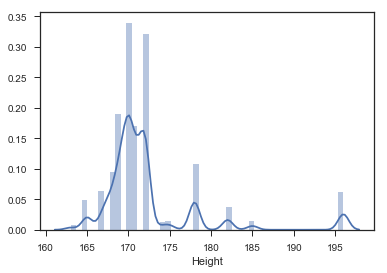

In [93]:
sns.distplot(absenteism_data['Height'])

C:\Users\Hasan\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


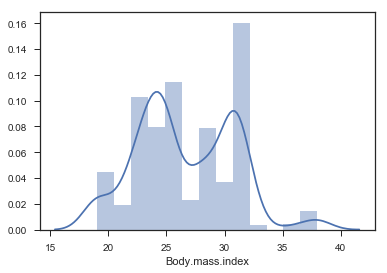

In [94]:
sns.distplot(absenteism_data['Body.mass.index'])

#### All continuous variables have skewed distributions

# Outlier Analysis for continuous variables

In [42]:
#continous variables
cnames = ['Weight','Distance.from.Residence.to.Work','Service.time','Transportation.expense','Work.load.Average.day','Absenteeism.time.in.hours','Height','Body.mass.index','Age','Hit.target']

#categorical variables
catnames = ['Day.of.the.week','Seasons','Month.of.absence','Social.drinker','Reason.for.absence','Social.smoker','Pet','Son',
'Disciplinary.failure','Education']

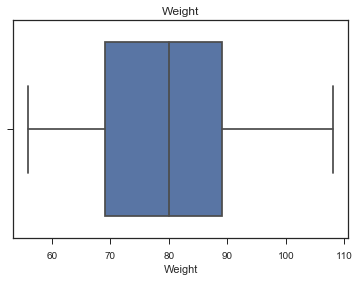

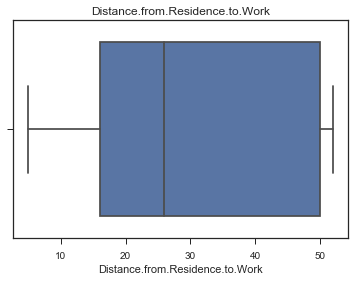

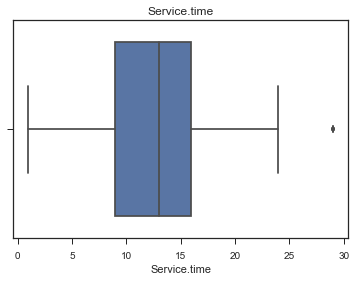

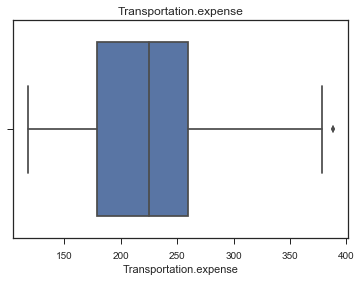

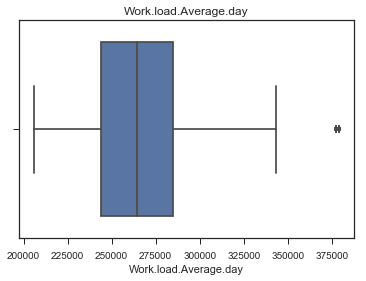

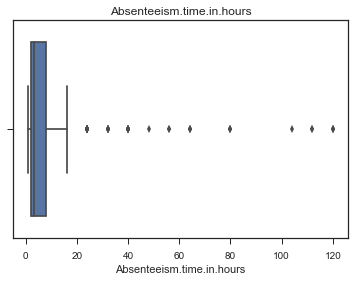

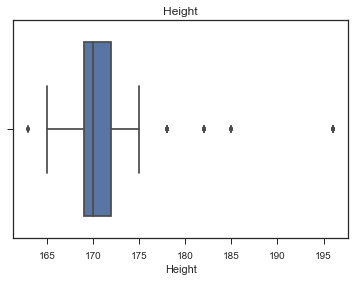

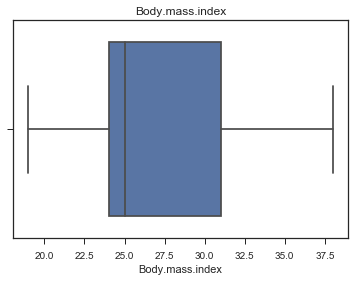

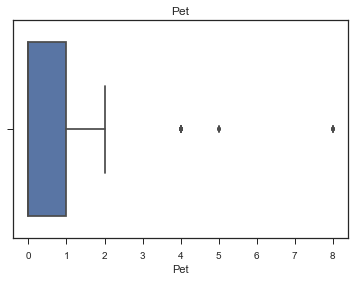

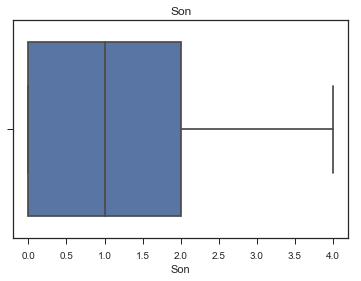

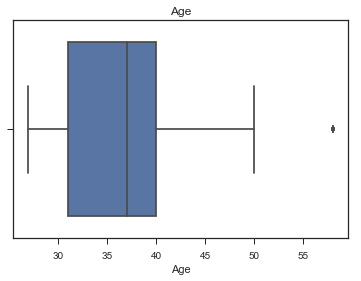

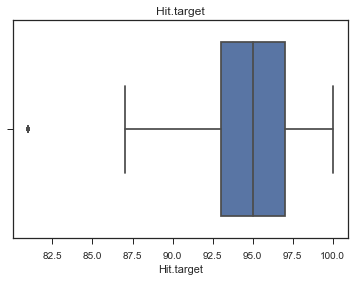

In [38]:
#Plot boxplot to visualize Outliers
for i in cnames:
    plt.figure()
    plt.clf() #clearing the figure
    sns.boxplot(absenteism_data[i],palette="deep")
    plt.title(i)
    plt.show()

Capping Outliers

In [39]:
for i in cnames:
    print(i)
    q75, q25 = np.percentile(absenteism_data.loc[:,i], [75,25])
    iqr = q75 - q25
    minn = q25 - (iqr*1.5)
    maxx = q75 + (iqr*1.5)
    print(minn)
    print(maxx)
    
    print('{var} -----> {X} Outliers'.format(var = i, X = (absenteism_data.loc[absenteism_data.loc[:,i] < minn,i].count() + 
                                                           absenteism_data.loc[absenteism_data.loc[:,i] > maxx,i].count())))  
    absenteism_data.loc[absenteism_data[i] < minn,i] = minn
    absenteism_data.loc[absenteism_data[i] > maxx,i] = maxx
    

Weight
39.0
119.0
Weight -----> 0 Outliers
Distance.from.Residence.to.Work
-35.0
101.0
Distance.from.Residence.to.Work -----> 0 Outliers
Service.time
-1.5
26.5
Service.time -----> 5 Outliers
Transportation.expense
57.5
381.5
Transportation.expense -----> 2 Outliers
Work.load.Average.day
181868.625
346643.625
Work.load.Average.day -----> 29 Outliers
Absenteeism.time.in.hours
-7.0
17.0
Absenteeism.time.in.hours -----> 43 Outliers
Height
164.5
176.5
Height -----> 109 Outliers
Body.mass.index
13.5
41.5
Body.mass.index -----> 0 Outliers
Pet
-1.5
2.5
Pet -----> 41 Outliers
Son
-3.0
5.0
Son -----> 0 Outliers
Age
17.5
53.5
Age -----> 8 Outliers
Hit.target
87.0
103.0
Hit.target -----> 15 Outliers


In [40]:
absenteism_data.head()

,ID,Reason.for.absence,Month.of.absence,Day.of.the.week,Seasons,Transportation.expense,Distance.from.Residence.to.Work,Service.time,Age,Work.load.Average.day,Hit.target,Disciplinary.failure,Education,Son,Social.drinker,Social.smoker,Pet,Weight,Height,Body.mass.index,Absenteeism.time.in.hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0
5,3,23.0,7.0,6,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0


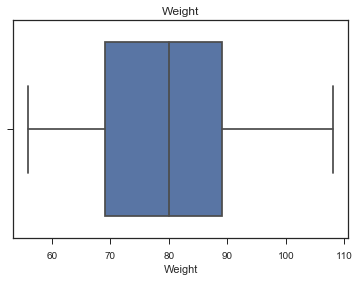

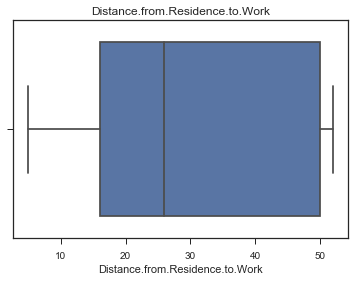

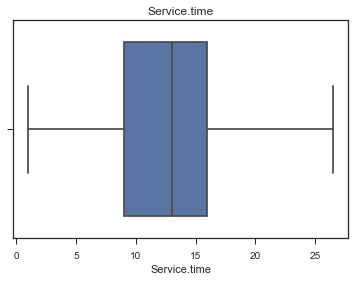

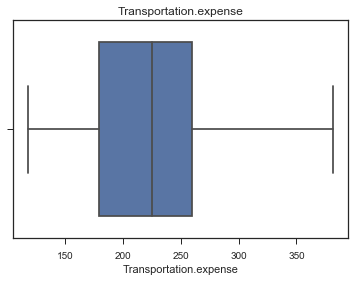

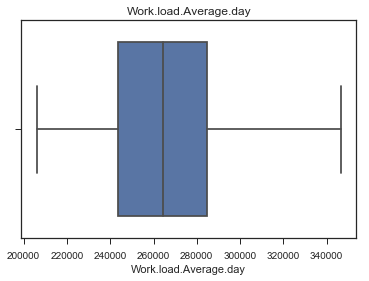

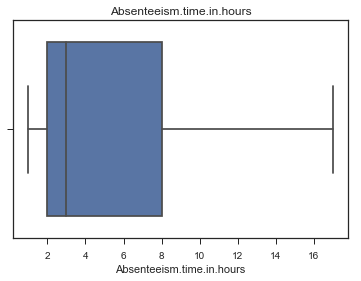

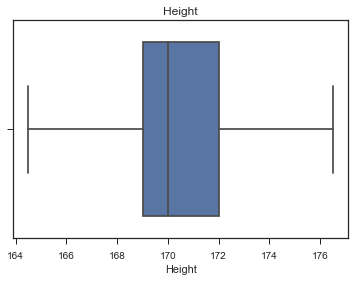

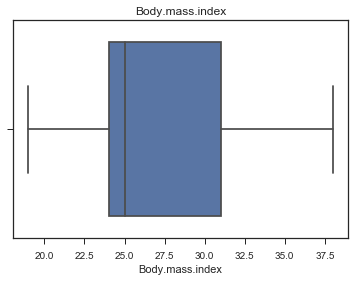

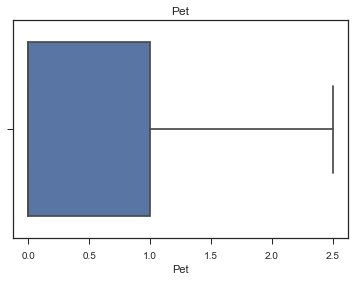

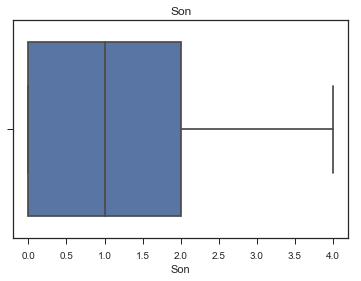

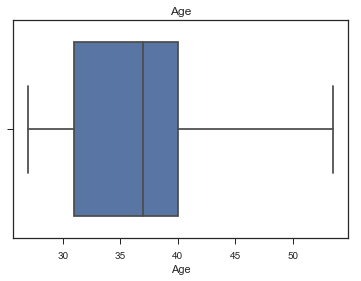

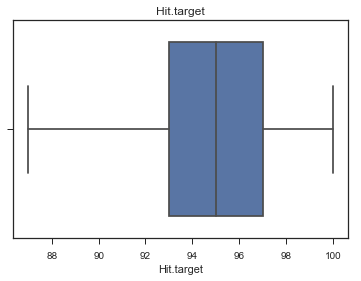

In [41]:
#Plot boxplot to visualize Outliers
for i in cnames:
    plt.figure()
    plt.clf() #clearing the figure
    sns.boxplot(absenteism_data[i],palette="deep")
    plt.title(i)
    plt.show()

All outliers have been capped.

# Correlation Analysis

Converting variables to categorical variables

In [43]:
for i in catnames:
    absenteism_data[i] = absenteism_data[i].astype('category')

C:\Users\Hasan\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [47]:
absenteism_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704 entries, 0 to 736
Data columns (total 21 columns):
ID                                 704 non-null int64
Reason.for.absence                 704 non-null category
Month.of.absence                   704 non-null category
Day.of.the.week                    704 non-null category
Seasons                            704 non-null category
Transportation.expense             704 non-null float64
Distance.from.Residence.to.Work    704 non-null float64
Service.time                       704 non-null float64
Age                                704 non-null float64
Work.load.Average.day              704 non-null float64
Hit.target                         704 non-null float64
Disciplinary.failure               704 non-null category
Education                          704 non-null category
Son                                704 non-null category
Social.drinker                     704 non-null category
Social.smoker                      704 non-null c

#### Chi2 test
Doing Chi-square test for correlation between categorical variables

In [48]:
from scipy.stats import chi2_contingency

In [50]:
factors_paired = [(i,j) for i in catnames for j in catnames] 
chi2, p_values =[], []
for f in factors_paired:
    if f[0] != f[1]:
        chitest = chi2_contingency(pd.crosstab(absenteism_data[f[0]], absenteism_data[f[1]]))
        chi2.append(chitest[0])
        p_values.append(chitest[1])
    else:
        chi2.append(0)
        p_values.append(0)

p1 = np.array(p_values).reshape((10,10))
p1 = pd.DataFrame(p1, index=catnames, columns=catnames)
p1

,Day.of.the.week,Seasons,Month.of.absence,Social.drinker,Reason.for.absence,Social.smoker,Pet,Son,Disciplinary.failure,Education
Day.of.the.week,0.000000e+00,3.948001e-01,6.087582e-01,3.575265e-01,6.131313e-02,8.227146e-01,1.936585e-01,2.223057e-09,2.460672e-01,5.439849e-01
Seasons,3.948001e-01,0.000000e+00,0.000000e+00,1.981972e-01,5.901286e-21,1.569992e-01,5.006294e-04,1.059010e-05,2.425953e-02,6.286186e-02
Month.of.absence,6.087582e-01,0.000000e+00,0.000000e+00,2.363939e-02,2.328978e-15,3.194987e-02,1.056365e-03,3.123398e-05,4.180979e-01,8.639891e-03
Social.drinker,3.575265e-01,1.981972e-01,2.363939e-02,0.000000e+00,1.711278e-08,1.515194e-02,7.056224e-26,3.706723e-09,6.721064e-01,3.391862e-34
Reason.for.absence,6.131313e-02,5.901286e-21,2.328978e-15,1.711278e-08,0.000000e+00,1.914852e-08,6.098427e-20,1.741446e-18,4.768228e-13,1.749968e-10
Social.smoker,8.227146e-01,1.569992e-01,3.194987e-02,1.515194e-02,1.914852e-08,0.000000e+00,2.736009e-06,4.132435e-21,2.660185e-03,1.984123e-24
Pet,1.936585e-01,5.006294e-04,1.056365e-03,7.056224e-26,6.098427e-20,2.736009e-06,0.000000e+00,7.304515e-94,5.803994e-01,2.033844e-12
Son,2.223057e-09,1.059010e-05,3.123398e-05,3.706723e-09,1.741446e-18,4.132435e-21,7.304515e-94,0.000000e+00,4.545640e-01,9.146983e-12
Disciplinary.failure,2.460672e-01,2.425953e-02,4.180979e-01,6.721064e-01,4.768228e-13,2.660185e-03,5.803994e-01,4.545640e-01,0.000000e+00,9.094792e-01
Education,5.439849e-01,6.286186e-02,8.639891e-03,3.391862e-34,1.749968e-10,1.984123e-24,2.033844e-12,9.146983e-12,9.094792e-01,0.000000e+00


Dropping Seasons since p-value of 'Seasons' versus 'Month.of.absence' is 0.00(<0.05) rejecting null hypothesis that the two variables are independent.

In [51]:
absenteism_data = absenteism_data.drop(['Seasons'],axis=1)

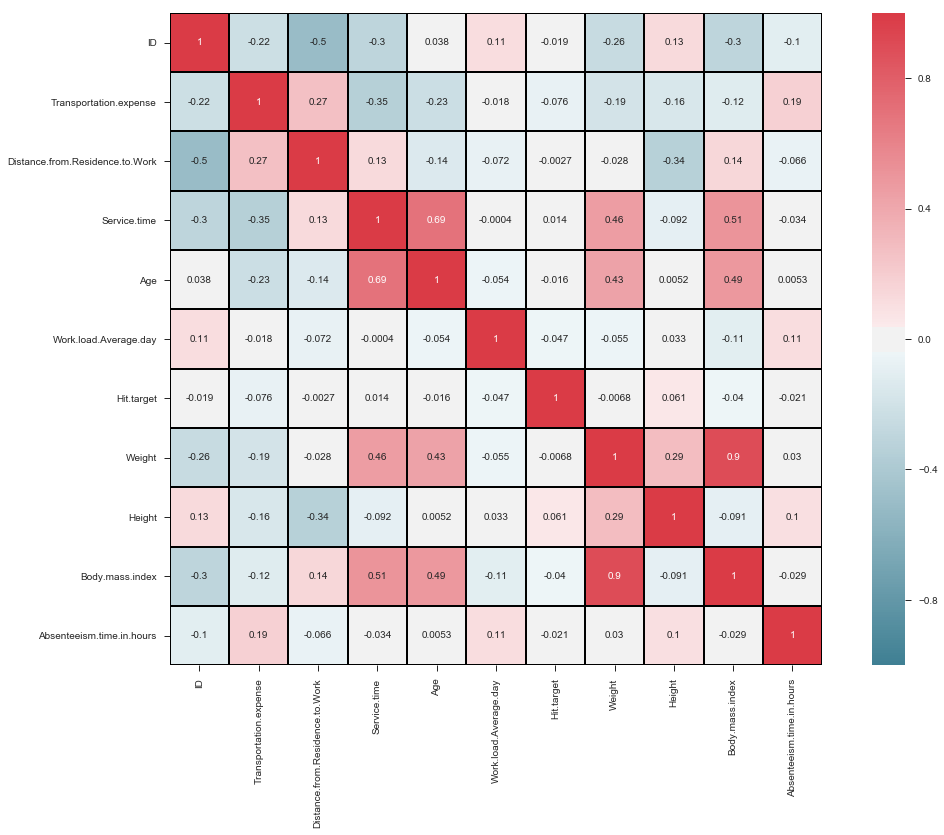

In [52]:
#Setting up the pane or matrix size
f, ax = plt.subplots(figsize=(18,12))  #Width,height

#Generating Corelation Matrix
corr = absenteism_data[absenteism_data.columns].corr()

#Plot using Seaborn library
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10, as_cmap=True),\
            square=True, ax=ax,annot=True,linewidths=1 , linecolor= 'black',vmin = -1, vmax = 1)

plt.show()
#f.savefig('heatmap.png')

Correlation test for continuous independent variables

No two variables have correlation coeff. > 0.95 so we will not drop any continuous independent variables.

# Relationships of categorical independent variables with dependent variable

'Reason.for.absence' Vs. 'Absenteeism.time.in.hours'

In [59]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

NameError: name 'figure' is not defined

In [76]:
def relationship(a,b):
    df = absenteism_data.groupby(a)[b].sum()
    df = df.reset_index()
    df[b] = (df[b]*100)/sum(absenteism_data[b])
    df = df.sort_values(by=['Absenteeism.time.in.hours'])
    print(df)
    return df.plot.barh(x=a,y=b, figsize = (12,10))

   Reason.for.absence  Absenteeism.time.in.hours
15               16.0                   0.158520
2                 3.0                   0.211361
16               17.0                   0.211361
3                 4.0                   0.237781
14               15.0                   0.422721
1                 2.0                   0.449141
4                 5.0                   0.501982
22               24.0                   0.634082
7                 8.0                   0.845443
19               21.0                   0.924703
8                 9.0                   1.532365
5                 6.0                   1.796565
11               12.0                   2.060766
23               25.0                   2.853369
6                 7.0                   2.985469
13               14.0                   3.302510
0                 1.0                   3.566711
17               18.0                   4.068692
10               11.0                   4.280053
25               27.

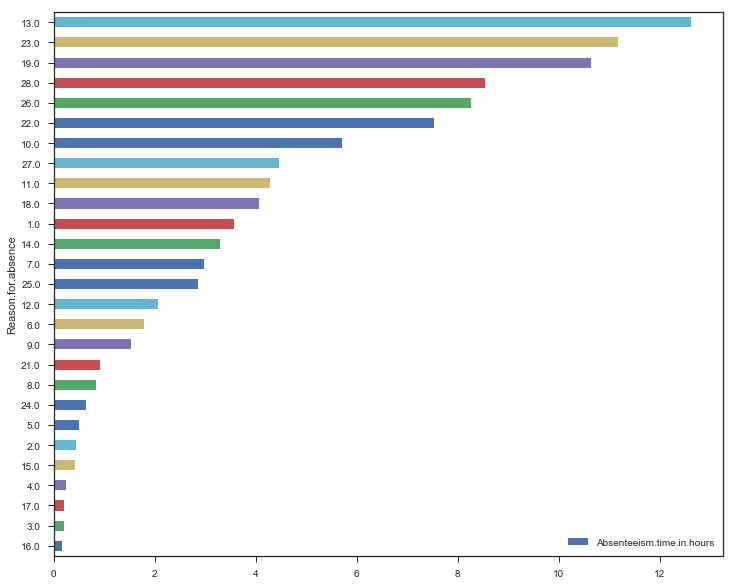

In [77]:
relationship('Reason.for.absence','Absenteeism.time.in.hours')

Top 3 categories in order of Absenteeism.time.in.hours are:
1. Category 13:Diseases of the musculoskeletal system and connective tissue - 12.62 % of total time
2. Category 23:medical consultation - 11.17 % of total time
3. Category 19:Injury, poisoning and certain other consequences of external causes - 10.64 % of total time
4. Category 28:dental consultation - 8.53 % 0f total time
5. Category 26:unjustified absence - 8.27 % of total time

Conclusions & possible remedies:
1. Musculoskeletal system disease is the major reason of absenteism_dataeeism. Bad working posture & high workload are possible reasons for the high incidence of musculoskeletal disease. Company should conduct a study on the working postures of people and go for more ergonomic workplace design. Company should try to optimize workload keeping in mind occupational health of working people.
2. Medical consultation may be brought down by optimizing workloads.
3. Injury incidence may be reduced by creating proper ergonomic working setup.
4. Dental consultation time may be reduced by informing employees of the dental health guidelines so that they can take better care of their teeth.
5. Unjustified absence is too high.Company should try to reduce high workloads so that employees don't feel work stress and take unjustified absence leave.

'Month.of.absence' Vs. 'Absenteeism.time.in.hours'

   Month.of.absence  Absenteeism.time.in.hours
0               1.0                   5.284016
11             12.0                   6.367239
8               9.0                   6.552180
7               8.0                   7.001321
1               2.0                   7.582563
5               6.0                   8.031704
3               4.0                   8.243065
4               5.0                   8.348745
9              10.0                   8.348745
10             11.0                   8.824306
6               7.0                  11.387054
2               3.0                  14.029062


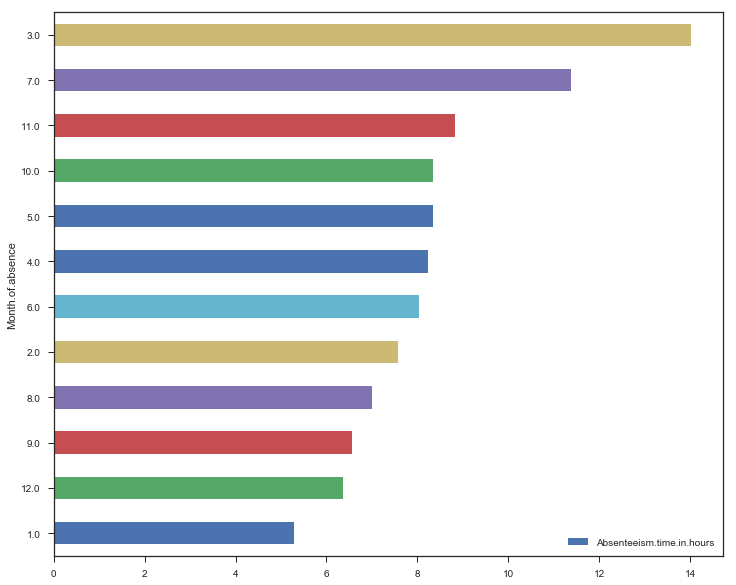

In [78]:
relationship('Month.of.absence','Absenteeism.time.in.hours')

Top 3 months in order of Absenteeism.time.in.hours are:

1. Month 3:March - 14.02 % of total time
2. Month 7:July - 11.38 % of total time
3. Month 11:November - 8.82 % of total time

'Day.of.the.week' Vs. 'Absenteeism.time.in.hours'

  Day.of.the.week  Absenteeism.time.in.hours
3               5                  14.848085
4               6                  16.301189
1               3                  20.634082
2               4                  22.192867
0               2                  26.023778


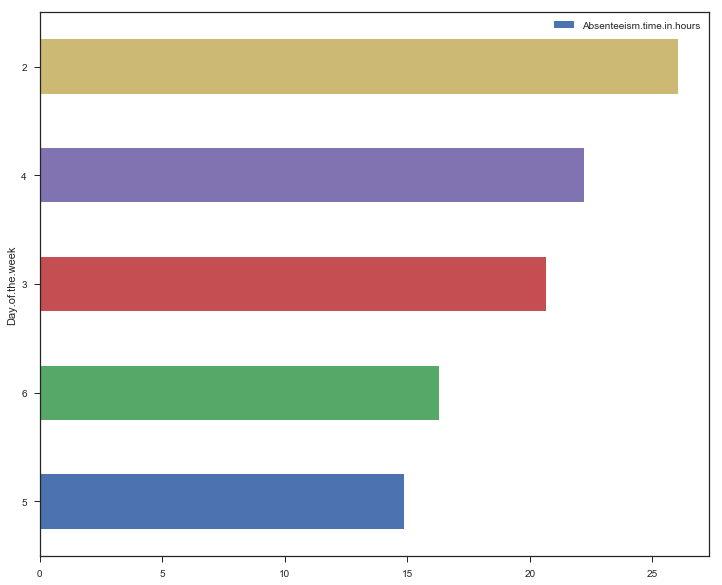

In [79]:
relationship('Day.of.the.week','Absenteeism.time.in.hours')

Top 3 days in order of Absenteeism.time.in.hours time are:

1. Day 2:Monday - 26.02 % of total time
2. Day 4:Wednesday - 22.19 % of total time
3. Day 3:Tuesday - 20.63 % of total time

'Education' Vs. 'Absenteeism.time.in.hours'

  Education  Absenteeism.time.in.hours
3       4.0                   0.554822
1       2.0                   6.974901
2       3.0                   9.775429
0       1.0                  82.694848


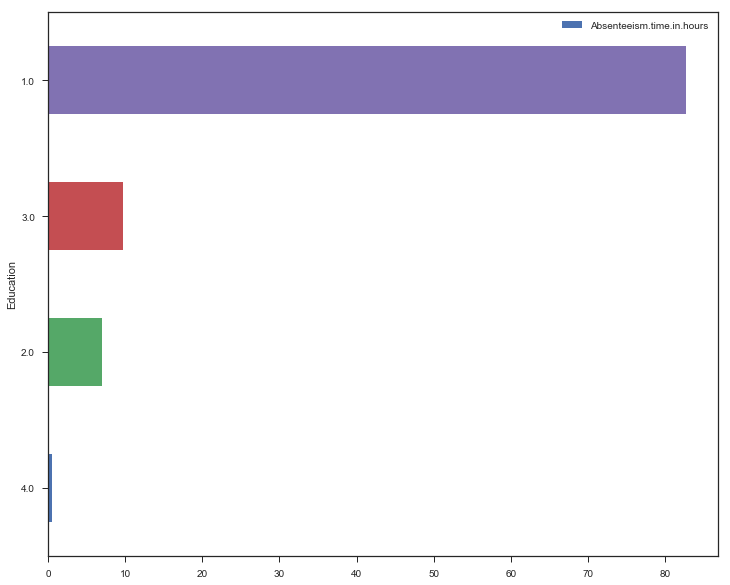

In [80]:
relationship('Education','Absenteeism.time.in.hours')

82.69 % of Absenteeism.time.in.hours time is contributed by people having high school education.
This may be due to majority of people having high school education. No conclusion may be drawn from this graph.

'Son' Vs. 'Absenteeism.time.in.hours'

   Son  Absenteeism.time.in.hours
3  3.0                   2.985469
4  4.0                   6.631440
2  2.0                  27.080581
1  1.0                  27.239102
0  0.0                  36.063408


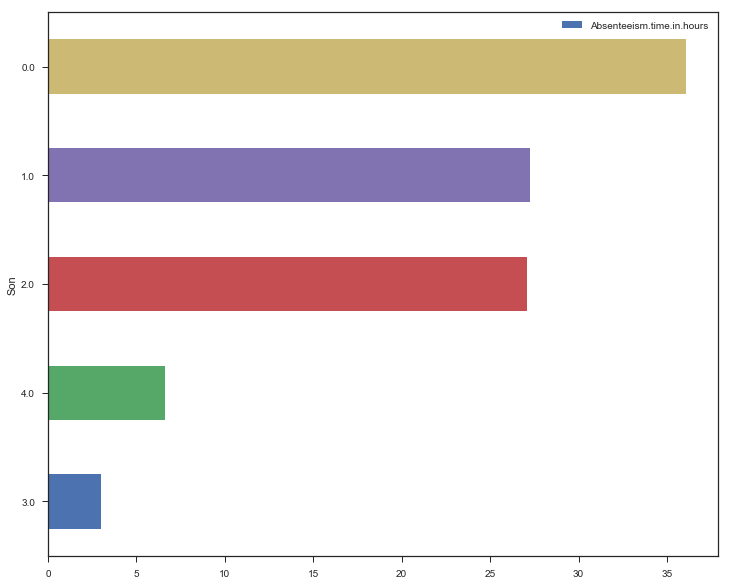

In [81]:
relationship('Son','Absenteeism.time.in.hours')

Top 3 categories in order of Absenteeism.time.in.hours are:

1. Category 0:No son - 36.06 % of total time
2. Category 1:One son - 27.23 % of total time
3. Category 2:Two sons - 27.08 % of total time

People with no son are taking most of Absenteeism.time.in.hours.

'Pet' Vs. 'Absenteeism.time.in.hours'

   Pet  Absenteeism.time.in.hours
3  2.5                   7.133421
2  2.0                   9.537649
1  1.0                  21.083223
0  0.0                  62.245707


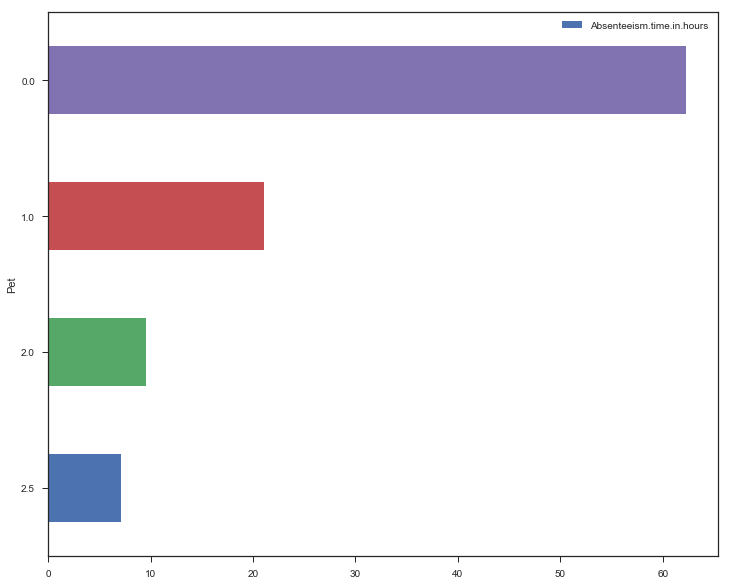

In [82]:
relationship('Pet','Absenteeism.time.in.hours')

Top 3 categories in order of Absenteeism.time.in.hours are:

1. Category 0:No pet - 62.24 % of total time
2. Category 1:One pet - 21.08 % of total time
3. Category 2:Two pets - 9.53 % of total time

People with no pet are taking most of Absenteeism.time.in.hours.

# Forecasting Absenteeism.time.in.hours in hours per month for 2011

In [83]:
absenteism_data.head()

,ID,Reason.for.absence,Month.of.absence,Day.of.the.week,Transportation.expense,Distance.from.Residence.to.Work,Service.time,Age,Work.load.Average.day,Hit.target,Disciplinary.failure,Education,Son,Social.drinker,Social.smoker,Pet,Weight,Height,Body.mass.index,Absenteeism.time.in.hours
0,11,26.0,7.0,3,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
2,3,23.0,7.0,4,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0
5,3,23.0,7.0,6,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0


Aggregating absence hrs. by month

In [103]:
monthly_absence = absenteism_data.groupby('Month.of.absence')['Absenteeism.time.in.hours'].sum()
monthly_absence

Month.of.absence
1.0     200.0
2.0     287.0
3.0     531.0
4.0     312.0
5.0     316.0
6.0     304.0
7.0     431.0
8.0     265.0
9.0     248.0
10.0    316.0
11.0    334.0
12.0    241.0
Name: Absenteeism.time.in.hours, dtype: float64

In [104]:
monthly_absence = monthly_absence.reset_index()
monthly_absence

,Month.of.absence,Absenteeism.time.in.hours
0,1.0,200.0
1,2.0,287.0
2,3.0,531.0
3,4.0,312.0
4,5.0,316.0
5,6.0,304.0
6,7.0,431.0
7,8.0,265.0
8,9.0,248.0
9,10.0,316.0


#### Dividing the dataset by 3 
Understanding the original data set we understandd that it is the data for 3 years. Since this information is not provided to us in the original question but months are repeated thrice hence this understanding. Divinding absence hrs. by 3 since this data is of 3 years from July,2007 to June,2010

In [105]:
monthly_absence['Absenteeism.hours.per.month'] = monthly_absence['Absenteeism.time.in.hours']/3

In [106]:
monthly_absence['Month.of.absence'] = monthly_absence['Month.of.absence'].astype('int')
monthly_absence

,Month.of.absence,Absenteeism.time.in.hours,Absenteeism.hours.per.month
0,1,200.0,66.666667
1,2,287.0,95.666667
2,3,531.0,177.000000
3,4,312.0,104.000000
4,5,316.0,105.333333
5,6,304.0,101.333333
6,7,431.0,143.666667
7,8,265.0,88.333333
8,9,248.0,82.666667
9,10,316.0,105.333333


In [107]:
monthly_absence = monthly_absence.set_index('Month.of.absence')

In [109]:
monthly_absence

,Absenteeism.time.in.hours,Absenteeism.hours.per.month
Month.of.absence,,
1,200.0,66.666667
2,287.0,95.666667
3,531.0,177.000000
4,312.0,104.000000
5,316.0,105.333333
6,304.0,101.333333
7,431.0,143.666667
8,265.0,88.333333
9,248.0,82.666667


In [110]:
monthly_absence = monthly_absence.drop(['Absenteeism.time.in.hours'],axis=1)

In [111]:
ts = monthly_absence['Absenteeism.hours.per.month']

In [112]:
ts

Month.of.absence
1      66.666667
2      95.666667
3     177.000000
4     104.000000
5     105.333333
6     101.333333
7     143.666667
8      88.333333
9      82.666667
10    105.333333
11    111.333333
12     80.333333
Name: Absenteeism.hours.per.month, dtype: float64

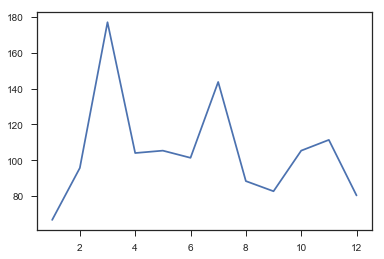

In [113]:
plt.plot(ts)

Performing Dickey Fuller test for stationarity

In [114]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(ts,autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

Test Statistic                -0.000000
p-value                        0.958532
#Lags Used                     7.000000
Number of Observations Used    4.000000
Critical Value (5%)           -4.474365
Critical Value (1%)           -7.355441
Critical Value (10%)          -3.126933
dtype: float64

Since Test Statistic > Critical Values for 1%, 5% & 10%, time series is not stationary.

In [115]:
ts_log = np.log(ts)

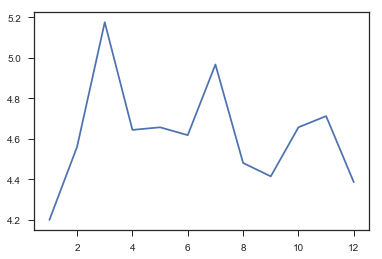

In [116]:
plt.plot(ts_log)

In [117]:
ts_diff = ts_log - ts_log.shift()

In [118]:
ts_diff

Month.of.absence
1          NaN
2     0.361165
3     0.615280
4    -0.531759
5     0.012739
6    -0.038715
7     0.349080
8    -0.486378
9    -0.066301
10    0.242313
11    0.055399
12   -0.326344
Name: Absenteeism.hours.per.month, dtype: float64

In [119]:
ts_diff.fillna(0,inplace=True)

In [120]:
dftest = adfuller(ts_diff)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

Test Statistic                 -3.069239
p-value                         0.028915
#Lags Used                      1.000000
Number of Observations Used    10.000000
Critical Value (5%)            -3.232950
Critical Value (1%)            -4.331573
Critical Value (10%)           -2.748700
dtype: float64

Since Test Statistic(-3.069239) < Critical Value for 10% (-2.748700), timeseries ts_diff is stationary.

In [121]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=10)
lag_pacf = pacf(ts_diff, nlags=10, method='ols')

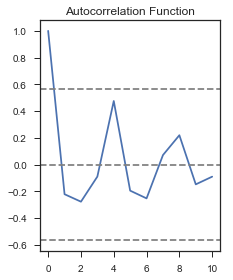

In [122]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.tight_layout()

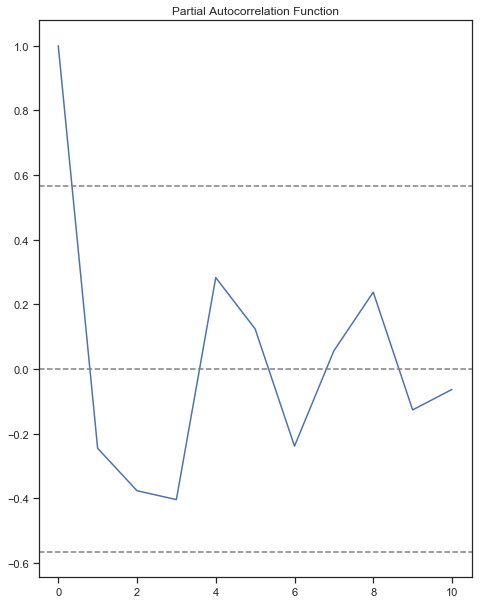

In [113]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

p = 0 and q = 0 from the above charts. We will have to check for various values of p & q.

In [123]:
from statsmodels.tsa.arima_model import ARIMA

In [124]:
model = ARIMA(ts_diff, order=(3, 0, 0))

In [125]:
results_AR = model.fit(disp=-1)

In [126]:
results_AR.fittedvalues

Month.of.absence
1     0.001786
2     0.002100
3    -0.092374
4    -0.613604
5    -0.336879
6    -0.053862
7     0.378447
8    -0.187987
9     0.087084
10    0.142378
11    0.231878
12   -0.149071
dtype: float64

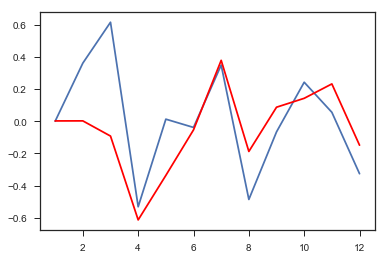

In [127]:
plt.plot(ts_diff)
plt.plot(results_AR.fittedvalues, color='red')

Finding sum of Residual Sum of Squares(RSS) for evaluation of ARIMA model

In [128]:
RSS = (results_AR.fittedvalues-ts_diff)**2
RSS.fillna(0,inplace=True)
sum(RSS)

0.9448502021962154

RSS for various order combinations

1. RSS = 6.179 for order=(1,2,1)
2. RSS = 1.051 for order=(1,0,1)
3. RSS = 2.277 for order=(1,1,1)
4. RSS = 1.018 for order=(2,0,1)
5. RSS = 2.082 for order=(2,1,1)
6. RSS = 6.802 for order=(2,2,1)
7. RSS = 0.944 for order=(3,0,0)

order=(3,0,0) gives lowest RSS of 0.944. So, we will use order=(3,0,0)

In [129]:
preds = results_AR.predict(start=12,end=24)

In [130]:
preds

12    0.001496
13    0.189999
14    0.109327
15   -0.191649
16   -0.081554
17    0.111858
18    0.122536
19   -0.090272
20   -0.099224
21    0.044382
22    0.107086
23   -0.022916
24   -0.083924
dtype: float64

In [131]:
preds = preds[1:]

In [132]:
predictions_ARIMA_diff = preds

In [133]:
predictions_ARIMA_diff

13    0.189999
14    0.109327
15   -0.191649
16   -0.081554
17    0.111858
18    0.122536
19   -0.090272
20   -0.099224
21    0.044382
22    0.107086
23   -0.022916
24   -0.083924
dtype: float64

In [134]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

In [135]:
ts_diff

Month.of.absence
1     0.000000
2     0.361165
3     0.615280
4    -0.531759
5     0.012739
6    -0.038715
7     0.349080
8    -0.486378
9    -0.066301
10    0.242313
11    0.055399
12   -0.326344
Name: Absenteeism.hours.per.month, dtype: float64

In [136]:
predictions_ARIMA_diff_cumsum

13    0.189999
14    0.299327
15    0.107678
16    0.026124
17    0.137982
18    0.260518
19    0.170247
20    0.071023
21    0.115404
22    0.222490
23    0.199574
24    0.115650
dtype: float64

In [137]:
predictions_ARIMA_log = pd.Series(4.8, index=range(13,25))
predictions_ARIMA_log
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)

In [138]:
sum(ts_log)/12

4.622994503720343

In [139]:
predictions_ARIMA_log

13    4.989999
14    5.099327
15    4.907678
16    4.826124
17    4.937982
18    5.060518
19    4.970247
20    4.871023
21    4.915404
22    5.022490
23    4.999574
24    4.915650
dtype: float64

In [140]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)

In [141]:
predictions_ARIMA

13    146.936333
14    163.911527
15    135.324775
16    124.726534
17    139.488442
18    157.672191
19    144.062400
20    130.454289
21    136.374457
22    151.788801
23    148.349919
24    136.407966
dtype: float64

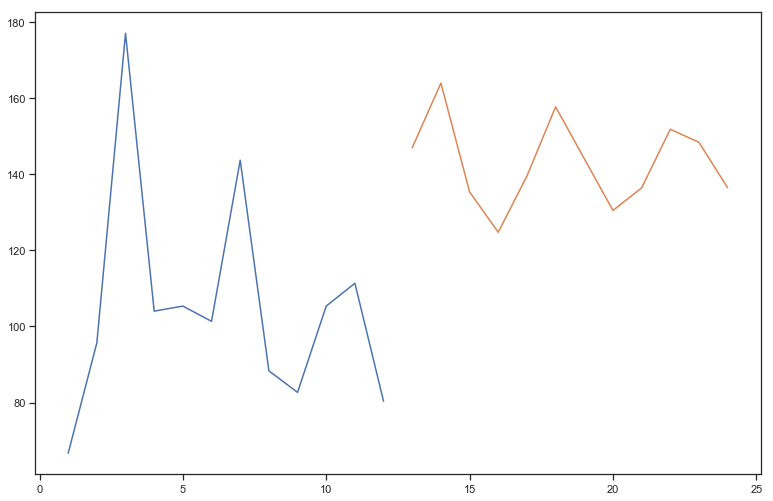

In [133]:
plt.plot(ts)
plt.plot(predictions_ARIMA)